# Preparation

In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

data = pd.read_csv('virusshare.csv', sep=',',skiprows=1, header=None).to_numpy()

X = data[:,1:]
Y = data[:,0]

def testModel(model,modelName):
    kf = KFold(n_splits=5)
    acc_scores = []
    f1_scores = []

    for train_index, test_index in kf.split(X):
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        model.fit(train_X,train_Y)
        pred_values = model.predict(test_X)
        acc = accuracy_score(pred_values , test_Y)
        f1 = f1_score(pred_values , test_Y)
        acc_scores.append(acc)
        f1_scores.append(f1)

    avg_acc_score = sum(acc_scores)/5
    avg_f1_score = sum(f1_scores)/5

    print('Method: '+modelName)
    print('accuracy of each fold - {}'.format(acc_scores))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('f1 of each fold - {}'.format(f1_scores))
    print('Avg f1 : {}'.format(avg_f1_score))
    print('\n')
    return avg_f1_score


# Logistic Regression (Ridge)

In [14]:
from sklearn.linear_model import LogisticRegression
testModel(LogisticRegression(solver = "liblinear", penalty = "l2"),"Ridge logistic regression")

Method: Ridge logistic regression
accuracy of each fold - [0.67475, 0.695, 0.68475, 0.68, 0.685]
Avg accuracy : 0.6839000000000001
f1 of each fold - [0.6882338844955668, 0.7174617878647522, 0.6873295313662288, 0.6842624568327578, 0.6987087517934002]
Avg f1 : 0.6951992824705412


# Logistic Regression (LASSO)

In [15]:
from sklearn.linear_model import LogisticRegression
testModel(LogisticRegression(solver = "liblinear", penalty = "l1"),"LASSO logistic regression")

Method: LASSO logistic regression
accuracy of each fold - [0.6755, 0.69525, 0.6835, 0.6805, 0.684]
Avg accuracy : 0.6837500000000001
f1 of each fold - [0.6891762452107278, 0.717497103128621, 0.6872529644268774, 0.685066535239034, 0.6971729755630092]
Avg f1 : 0.6952331647136539


# Multilayer Perceptron

In [17]:
from sklearn.neural_network import MLPClassifier
testModel(MLPClassifier(solver='sgd', learning_rate = "adaptive", learning_rate_init = 0.1, alpha=1e-5,hidden_layer_sizes=(10, 2), random_state=1,max_iter=500),"multilayer perceptron")

Method: multilayer perceptron
accuracy of each fold - [0.79775, 0.7895, 0.79875, 0.80075, 0.80125]
Avg accuracy : 0.7976
f1 of each fold - [0.7956554685526648, 0.7900249376558603, 0.7943805874840357, 0.8023803620133894, 0.8010012515644556]
Avg f1 : 0.7966885214540811


# SVM

In [ ]:
from sklearn.svm import LinearSVC
testModel(LinearSVC(penalty = "l1", loss="squared_hinge",dual=False, max_iter = 10000, tol = 0.001),"SVM")

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
testModel(DecisionTreeClassifier(random_state=0),"decision tree")

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
testModel(RandomForestClassifier(max_depth=300, random_state=0),"random forest")

# Gaussian Naive Bayes

In [3]:
from sklearn.naive_bayes import GaussianNB
testModel(GaussianNB(),"Gaussian Naive Bayes")

Method: Gaussian Naive Bayes
accuracy of each fold - [0.562, 0.5445, 0.54625, 0.56225, 0.5485]
Avg accuracy : 0.5527000000000001
f1 of each fold - [0.32407407407407407, 0.2948916408668731, 0.30003856536829926, 0.315748339194998, 0.3148710166919575]
Avg f1 : 0.30992472723924036




# k Nearest Neighbors (cosine distance)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
testModel(KNeighborsClassifier(n_neighbors=5, metric="cosine"),"kNN (cosine)")

C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Method: kNN (cosine)
accuracy of each fold - [0.83, 0.826, 0.82775, 0.8275, 0.82875]
Avg accuracy : 0.828
f1 of each fold - [0.826264690853347, 0.8215384615384614, 0.8258781905483953, 0.8275, 0.8310727496917386]
Avg f1 : 0.8264508185263886




C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# k Nearest Neighbors (Euclidean distance)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
testModel(KNeighborsClassifier(n_neighbors=5, metric="euclidean"),"kNN (Euclidean)")

C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Method: kNN (Euclidean)
accuracy of each fold - [0.8245, 0.8235, 0.82225, 0.829, 0.83025]
Avg accuracy : 0.8259000000000001
f1 of each fold - [0.8225480283114256, 0.8194373401534527, 0.8183908045977012, 0.8280542986425339, 0.829867201202706]
Avg f1 : 0.8236595345815638




C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Ridge Logistic Regression + AdaBoost

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
ridge = LogisticRegression(solver = "liblinear",penalty = "l2")
testModel(AdaBoostClassifier(estimator = ridge, n_estimators=30),"ridge + AdaBoost")

TypeError: __init__() got an unexpected keyword argument 'estimator'

# Random Forest + AdaBoost

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, random_state=0)
testModel(AdaBoostClassifier(estimator = rf, n_estimators=10),"random forest + AdaBoost")

TypeError: __init__() got an unexpected keyword argument 'estimator'

# FTRL

In [ ]:
import numpy as np
from datatable import Frame
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


data = pd.read_csv('virusshare.csv', sep=',',skiprows=1, header=None).to_numpy()

X = data[:,1:]
Y = data[:,0]

def testFTRL(model,modelName):
    kf = KFold(n_splits=5)
    acc_scores = []
    f1_scores = []

    for train_index, test_index in kf.split(X):
        train_X, test_X = Frame(X[train_index]), Frame(X[test_index])
        train_Y, test_Y = Frame(Y[train_index]), Frame(Y[test_index])
        model.fit(train_X,train_Y)
        pred_values = model.predict(test_X).to_numpy()
        pred_values = np.rint(pred_values)
        acc = accuracy_score(pred_values, Y[test_index])
        f1 = f1_score(pred_values , Y[test_index])
        acc_scores.append(acc)
        f1_scores.append(f1)

    avg_acc_score = sum(acc_scores)/5
    avg_f1_score = sum(f1_scores)/5

    print('Method: '+modelName)
    print('accuracy of each fold - {}'.format(acc_scores))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('f1 of each fold - {}'.format(f1_scores))
    print('Avg f1 : {}'.format(avg_f1_score))
from datatable.models import Ftrl
testFTRL(Ftrl(),"FTRL")


Since Jupyter Notebook fails to detect the datatable package, the results are listed in text form.

Method: FTRL

accuracy of each fold - [0.8065, 0.80125, 0.7935, 0.796, 0.80175]

Avg accuracy : 0.7998000000000001

f1 of each fold - [0.7913746630727764, 0.785540868626922, 0.7750544662309369, 0.7807630306286942, 0.8050159822965332]

Avg f1 : 0.7875498021711725

## Dimensionality Reduction (PCA) + Models

In [20]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    from sklearn.linear_model import LogisticRegression
    from sklearn.neural_network import MLPClassifier
    from sklearn.neural_network import MLPClassifier
    from sklearn.svm import LinearSVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import AdaBoostClassifier

variation = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
avgF1_LR_Ridge=[]
avgF1_LR_LASSO=[]
avgF1_MLP=[]
avgF1_LinearSVC=[]
avgF1_dTree=[]
avgF1_randomForest=[]
avgF1_gaussianNB=[]
avgF1_knn_Cosine=[]
avgF1_knn_Euclidean=[]

for i in variation:
    print("\n\nPCA(explained variance={})".format(i))
    fileName_X="X_pca{}.csv".format(i)
    X = pd.read_csv(fileName_X,sep=',',skiprows=1, header=None).to_numpy()
    
    avgF1_LR_Ridge.append(testModel(LogisticRegression(solver = "liblinear", penalty = "l2"),"Ridge logistic regression"))
    avgF1_LR_LASSO.append(testModel(LogisticRegression(solver = "liblinear", penalty = "l1"),"LASSO logistic regression"))
    avgF1_MLP.append(testModel(MLPClassifier(solver='sgd', learning_rate = "adaptive", learning_rate_init = 0.1, alpha=1e-5,hidden_layer_sizes=(10, 2), random_state=1,max_iter=500),"multilayer perceptron"))
    avgF1_LinearSVC.append(testModel(LinearSVC(penalty = "l1", loss="squared_hinge",dual=False, max_iter = 10000, tol = 0.001),"SVM"))
    avgF1_dTree.append(testModel(DecisionTreeClassifier(random_state=0),"decision tree"))
    avgF1_randomForest.append(testModel(RandomForestClassifier(max_depth=300, random_state=0),"random forest"))
    avgF1_gaussianNB.append(testModel(GaussianNB(),"Gaussian Naive Bayes"))
    avgF1_knn_Cosine.append(testModel(KNeighborsClassifier(n_neighbors=5, metric="cosine"),"kNN (cosine)"))
    avgF1_knn_Euclidean.append(testModel(KNeighborsClassifier(n_neighbors=5, metric="euclidean"),"kNN (Euclidean)"))
    
    #ridge = LogisticRegression(solver = "liblinear",penalty = "l2")
    #testModel(AdaBoostClassifier(estimator = ridge, n_estimators=30),"ridge + AdaBoost")
    #rf = RandomForestClassifier(max_depth=10, random_state=0)
    #testModel(AdaBoostClassifier(estimator = rf, n_estimators=10),"random forest + AdaBoost")
    
print(avgF1_LR_Ridge)
print(avgF1_LR_LASSO)
print(avgF1_MLP)
print(avgF1_LinearSVC)
print(avgF1_dTree)
print(avgF1_randomForest)
print(avgF1_gaussianNB)
print(avgF1_knn_Cosine)
print(avgF1_knn_Euclidean)



PCA(explained variance=0.7)
Method: Ridge logistic regression
accuracy of each fold - [0.67475, 0.695, 0.68475, 0.68, 0.685]
Avg accuracy : 0.6839000000000001
f1 of each fold - [0.6882338844955668, 0.7174617878647522, 0.6873295313662288, 0.6842624568327578, 0.6987087517934002]
Avg f1 : 0.6951992824705412


Method: LASSO logistic regression
accuracy of each fold - [0.6755, 0.69525, 0.6835, 0.6805, 0.684]
Avg accuracy : 0.6837500000000001
f1 of each fold - [0.6891762452107278, 0.717497103128621, 0.6872529644268774, 0.685066535239034, 0.6971729755630092]
Avg f1 : 0.6952331647136539


Method: multilayer perceptron
accuracy of each fold - [0.79775, 0.7895, 0.79875, 0.80075, 0.80125]
Avg accuracy : 0.7976
f1 of each fold - [0.7956554685526648, 0.7900249376558603, 0.7943805874840357, 0.8023803620133894, 0.8010012515644556]
Avg f1 : 0.7966885214540811


Method: SVM
accuracy of each fold - [0.68725, 0.6865, 0.696, 0.692, 0.702]
Avg accuracy : 0.69275
f1 of each fold - [0.7176709546377794, 0.7

C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Method: kNN (cosine)
accuracy of each fold - [0.83, 0.826, 0.82775, 0.8275, 0.82875]
Avg accuracy : 0.828
f1 of each fold - [0.826264690853347, 0.8215384615384614, 0.8258781905483953, 0.8275, 0.8310727496917386]
Avg f1 : 0.8264508185263886




C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Method: kNN (Euclidean)
accuracy of each fold - [0.8245, 0.8235, 0.82225, 0.829, 0.83025]
Avg accuracy : 0.8259000000000001
f1 of each fold - [0.8225480283114256, 0.8194373401534527, 0.8183908045977012, 0.8280542986425339, 0.829867201202706]
Avg f1 : 0.8236595345815638




PCA(explained variance=0.75)
Method: Ridge logistic regression
accuracy of each fold - [0.69325, 0.70575, 0.69825, 0.691, 0.7015]
Avg accuracy : 0.69795
f1 of each fold - [0.6984517080363726, 0.724935732647815, 0.6960463359355326, 0.6900702106318956, 0.7082111436950148]
Avg f1 : 0.7035430261893261


Method: LASSO logistic regression
accuracy of each fold - [0.6945, 0.706, 0.69925, 0.6905, 0.7015]
Avg accuracy : 0.6983500000000001
f1 of each fold - [0.7001962708537783, 0.7247191011235955, 0.69720614145482, 0.68941294530858, 0.7082111436950148]
Avg f1 : 0.7039491204871576


Method: multilayer perceptron
accuracy of each fold - [0.7785, 0.763, 0.777, 0.77425, 0.77925]
Avg accuracy : 0.7744
f1 of each fold - [0.792602996

C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Method: kNN (cosine)
accuracy of each fold - [0.83225, 0.82075, 0.8215, 0.82925, 0.82575]
Avg accuracy : 0.8259000000000001
f1 of each fold - [0.8312798591903444, 0.8159178433889602, 0.8204225352112675, 0.8318148239349914, 0.8265737745707887]
Avg f1 : 0.8252017672592705




C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Method: kNN (Euclidean)
accuracy of each fold - [0.8305, 0.82025, 0.8225, 0.829, 0.8315]
Avg accuracy : 0.82675
f1 of each fold - [0.8272171253822629, 0.8124184711714063, 0.818877551020408, 0.8304412493802678, 0.8320039880358924]
Avg f1 : 0.8241916769980475




PCA(explained variance=0.8)
Method: Ridge logistic regression
accuracy of each fold - [0.70325, 0.71025, 0.70225, 0.6995, 0.7095]
Avg accuracy : 0.70495
f1 of each fold - [0.7092823903992163, 0.72774254169603, 0.7002265290712307, 0.7017369727047146, 0.7139340226489413]
Avg f1 : 0.7105844913040266


Method: LASSO logistic regression
accuracy of each fold - [0.70375, 0.71, 0.7055, 0.69925, 0.7115]
Avg accuracy : 0.7060000000000001
f1 of each fold - [0.7094876195145869, 0.7274436090225563, 0.7035732259687971, 0.7015628876209378, 0.7161829808165272]
Avg f1 : 0.7116500645886811


Method: multilayer perceptron
accuracy of each fold - [0.80875, 0.79825, 0.79875, 0.7985, 0.80825]
Avg accuracy : 0.8025
f1 of each fold - [0.80419759406194

C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Method: kNN (cosine)
accuracy of each fold - [0.82625, 0.82225, 0.824, 0.8305, 0.8265]
Avg accuracy : 0.8259000000000001
f1 of each fold - [0.822477650063857, 0.8172706245181188, 0.820040899795501, 0.8275686673448626, 0.8276204669647292]
Avg f1 : 0.8229956617374137




C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Method: kNN (Euclidean)
accuracy of each fold - [0.82625, 0.81825, 0.82575, 0.831, 0.828]
Avg accuracy : 0.82585
f1 of each fold - [0.8232901093312992, 0.8149656401119878, 0.8206843323900179, 0.8307461191787682, 0.8276553106212425]
Avg f1 : 0.823468302326663




PCA(explained variance=0.85)
Method: Ridge logistic regression
accuracy of each fold - [0.71725, 0.7195, 0.70675, 0.7105, 0.71675]
Avg accuracy : 0.7141500000000001
f1 of each fold - [0.7229977957384276, 0.7382174521698555, 0.7065298974230673, 0.7156188605108056, 0.7211420132906718]
Avg f1 : 0.7209012038265655


Method: LASSO logistic regression
accuracy of each fold - [0.71575, 0.71825, 0.707, 0.71025, 0.71775]
Avg accuracy : 0.7138000000000001
f1 of each fold - [0.7222086489127779, 0.737234786663558, 0.7065598397596395, 0.7157223448614177, 0.7222632226322262]
Avg f1 : 0.7207977685659238


Method: multilayer perceptron
accuracy of each fold - [0.78525, 0.77125, 0.78625, 0.788, 0.7965]
Avg accuracy : 0.78545
f1 of each fold - [

C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Method: kNN (cosine)
accuracy of each fold - [0.82675, 0.822, 0.822, 0.82925, 0.82625]
Avg accuracy : 0.8252499999999999
f1 of each fold - [0.8237986270022883, 0.8200202224469161, 0.8179959100204499, 0.8276558163007823, 0.8278424572702502]
Avg f1 : 0.8234626066081374




C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Method: kNN (Euclidean)
accuracy of each fold - [0.82925, 0.82075, 0.8275, 0.8275, 0.83175]
Avg accuracy : 0.82735
f1 of each fold - [0.8272198330381989, 0.818435046847303, 0.8253164556962025, 0.8242485990830362, 0.8312860366006518]
Avg f1 : 0.8253011942530785




PCA(explained variance=0.9)
Method: Ridge logistic regression
accuracy of each fold - [0.72925, 0.71675, 0.73, 0.7365, 0.7415]
Avg accuracy : 0.7308
f1 of each fold - [0.7465480926749357, 0.7385183475651973, 0.7383720930232559, 0.750945179584121, 0.7514423076923077]
Avg f1 : 0.7451652041079635


Method: LASSO logistic regression
accuracy of each fold - [0.73075, 0.71625, 0.7295, 0.73625, 0.71725]
Avg accuracy : 0.726
f1 of each fold - [0.747597843918444, 0.7378147378147377, 0.7380145278450364, 0.7508854781582054, 0.7181659606279591]
Avg f1 : 0.7384957096728766


Method: multilayer perceptron
accuracy of each fold - [0.80725, 0.80225, 0.80125, 0.7865, 0.804]
Avg accuracy : 0.8002500000000001
f1 of each fold - [0.80642731609339

C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Method: kNN (cosine)
accuracy of each fold - [0.82725, 0.82075, 0.8205, 0.82875, 0.83125]
Avg accuracy : 0.8257
f1 of each fold - [0.8237694465697525, 0.8161066940241087, 0.816743236345074, 0.8287928017995501, 0.830103196576894]
Avg f1 : 0.8231030750630758




C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Method: kNN (Euclidean)
accuracy of each fold - [0.8285, 0.82225, 0.823, 0.83125, 0.8325]
Avg accuracy : 0.8274999999999999
f1 of each fold - [0.8278112449799198, 0.8187611521794546, 0.8181818181818182, 0.8298462314091252, 0.830722587165235]
Avg f1 : 0.8250646067831106




PCA(explained variance=0.95)
Method: Ridge logistic regression
accuracy of each fold - [0.745, 0.7335, 0.73875, 0.7425, 0.75275]
Avg accuracy : 0.7425
f1 of each fold - [0.7615708274894811, 0.7530120481927711, 0.7476454962569427, 0.7581023954908408, 0.7659171597633138]
Avg f1 : 0.7572495854386698


Method: LASSO logistic regression
accuracy of each fold - [0.74425, 0.72975, 0.738, 0.7445, 0.7525]
Avg accuracy : 0.7417999999999999
f1 of each fold - [0.7608136544306757, 0.7513227513227512, 0.7463697967086157, 0.7599812118365431, 0.7658467360454116]
Avg f1 : 0.7568668300687994


Method: multilayer perceptron
accuracy of each fold - [0.81025, 0.80175, 0.79325, 0.80375, 0.81925]
Avg accuracy : 0.80565
f1 of each fold - [0

C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Method: kNN (cosine)
accuracy of each fold - [0.82675, 0.82325, 0.826, 0.83325, 0.8355]
Avg accuracy : 0.8289500000000001
f1 of each fold - [0.8244236128705347, 0.8195968359275325, 0.8208032955715757, 0.832538287722822, 0.8367245657568239]
Avg f1 : 0.8268173195698576




C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Method: kNN (Euclidean)
accuracy of each fold - [0.822, 0.8265, 0.82375, 0.8295, 0.829]
Avg accuracy : 0.8261499999999999
f1 of each fold - [0.8201111672561899, 0.8213182286302779, 0.8209296418592837, 0.8285570638511816, 0.8315270935960591]
Avg f1 : 0.8244886390385984


[0.6951992824705412, 0.7035430261893261, 0.7105844913040266, 0.7209012038265655, 0.7451652041079635, 0.7572495854386698]
[0.6952331647136539, 0.7039491204871576, 0.7116500645886811, 0.7207977685659238, 0.7384957096728766, 0.7568668300687994]
[0.7966885214540811, 0.791096426231244, 0.7978830649219292, 0.771074077608233, 0.801264638849229, 0.7950984911161824]
[0.7213514500636246, 0.7259508539888199, 0.7220780944108338, 0.7304027630930164, 0.7459423987114013, 0.7538283274842443]
[0.8022573534869754, 0.8014862110691112, 0.805635662500198, 0.8023235603544764, 0.8000831368041041, 0.8044857169275778]
[0.8338309901583771, 0.8356837456079742, 0.8346759432240954, 0.8344325114902882, 0.8343940276551141, 0.8351218664835305]
[0.3099

C:\Users\emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


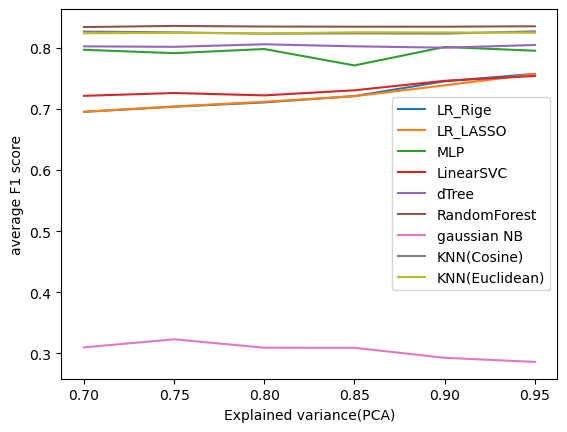

In [24]:
import matplotlib.pyplot as plt

plt.plot(variation, avgF1_LR_Ridge,label="LR_Rige")
plt.plot(variation, avgF1_LR_LASSO,label="LR_LASSO")
plt.plot(variation, avgF1_MLP,label="MLP")
plt.plot(variation, avgF1_LinearSVC,label="LinearSVC")
plt.plot(variation, avgF1_dTree,label="dTree")
plt.plot(variation, avgF1_randomForest,label="RandomForest")
plt.plot(variation, avgF1_gaussianNB,label="gaussian NB")
plt.plot(variation, avgF1_knn_Cosine,label="KNN(Cosine)")
plt.plot(variation, avgF1_knn_Euclidean,label="KNN(Euclidean)")

plt.xlabel('Explained variance(PCA)')
plt.ylabel('average F1 score')  
plt.legend()
plt.show()